# Exploratory data analysis of Amazon Top 50 Books

### Objective 
1. Check if there is any errors in the data (null value / typo / whitespace / unreasonable value)
2. Visualize the correlation matrix using heatmap
3. Create countplots 
4. Create multiple line plots in one figure 

#### The data 


### 1. Importing pacakages for preprocessing, analysis and visualization

In [1]:
#data preprocessing, analysis
import pandas as pd
import numpy as np

#visualization for graph
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading and reading the data 

In [2]:
amazon = pd.read_csv('/Users/minjeongkim/Desktop/datasets/bestsellers with categories.csv')

In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
amazon.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
# Check if there is any empty/null value in the dataframe 
print(amazon.isnull().sum().sum()) 

0


In [6]:
amazon['Genre'].value_counts(normalize=True) #Categorical 

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [7]:
amazon['User Rating'].value_counts(normalize=True)

4.8    0.230909
4.7    0.196364
4.6    0.190909
4.5    0.109091
4.9    0.094545
4.4    0.069091
4.3    0.045455
4.0    0.025455
4.2    0.014545
4.1    0.010909
3.9    0.005455
3.8    0.003636
3.3    0.001818
3.6    0.001818
Name: User Rating, dtype: float64

### 3. Preprocessing the data

In [8]:
sorted(amazon['Author'].unique().tolist())
# George R. R. Martin and J. K. Rowling are not counted as unique due to whitespace
amazon.loc[amazon.Author == 'George R.R. Martin', 'Author'] = "George R. R. Martin"
amazon.loc[amazon.Author == 'J.K. Rowling', 'Author'] = "J. K. Rowling"

In [9]:
amazon['Price'].value_counts().sort_index(ascending=True)

0      12
1       1
2       5
3       1
4      32
5      36
6      38
7      23
8      52
9      38
10     28
11     35
12     27
13     29
14     30
15     21
16     20
17     19
18     14
19      4
20     17
21      9
22      6
23      5
24      5
25      2
27      4
28      6
30      5
32      2
36      1
39      1
40      5
42      1
46     10
52      1
53      1
54      1
82      1
105     2
Name: Price, dtype: int64

In [10]:
# Error in the data as 12 books are worth $0
price_list = amazon.loc[amazon.Price != 0] 
free_list = amazon.loc[amazon.Price == 0] 
free_name= free_list['Name'].unique().tolist()

# Replace the data where price = 0 
#for i in free_name: 
    #actual_price = price_list.loc[price_list['Name'] == i, 'Price'].iloc[0]
    #amazon['Price'] = np.where(amazon['Price'] == 0 & amazon['Name'].isin(free_name), actual_price, amazon['Price'])

### 4. Visualization

#### 1) Heatmap

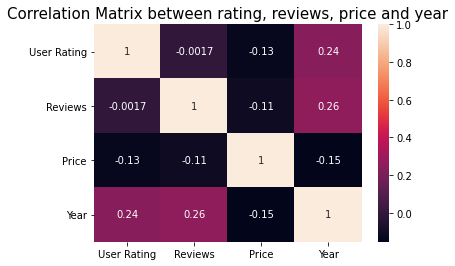

In [11]:
# Check the correlation between rating, reviews, price and year 
corrmat = amazon.corr()
sns.heatmap(corrmat, annot=True)
plt.title('Correlation Matrix between rating, reviews, price and year', fontsize = 15)
plt.show()

#### 2) Countplots

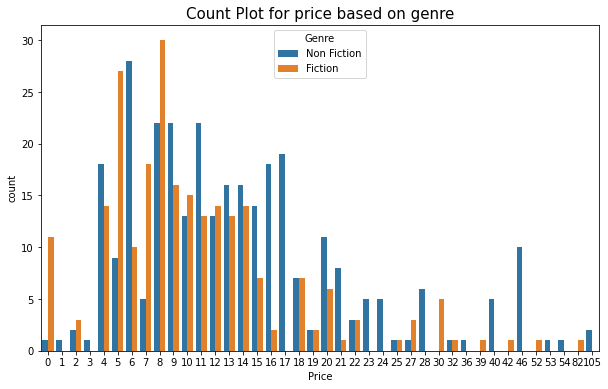

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x = amazon['Price'],hue=amazon['Genre'])
plt.title('Count Plot for price based on genre', fontsize = 15)
plt.show()

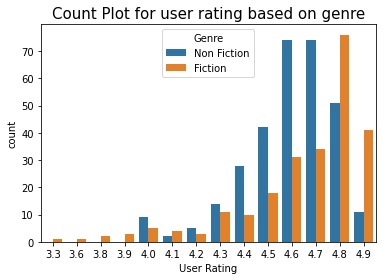

In [13]:
sns.countplot(x = amazon['User Rating'],hue=amazon['Genre'])
plt.title('Count Plot for user rating based on genre', fontsize = 15)
plt.show()

#### 3) Lineplots

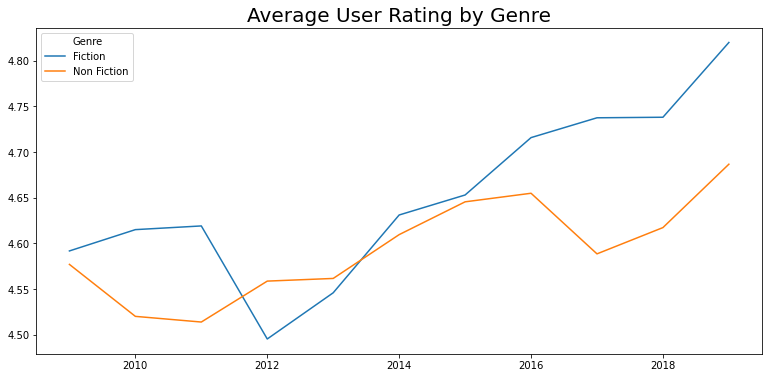

In [14]:
plt.figure(figsize=(13, 6))
avgrating_f = amazon[amazon['Genre'] == 'Fiction']
avgrating_f = avgrating_f.groupby(['Year'])['User Rating'].mean()
avgrating_f = avgrating_f.reset_index()

plt.plot(avgrating_f['Year'], avgrating_f['User Rating'], label = "Fiction")

avgrating_nf = amazon[amazon['Genre'] == 'Non Fiction']
avgrating_nf = avgrating_nf.groupby(['Year'])['User Rating'].mean()
avgrating_nf = avgrating_nf.reset_index()

plt.plot(avgrating_nf['Year'], avgrating_nf['User Rating'], label = "Non Fiction")
plt.title("Average User Rating by Genre", fontsize = 20)
plt.legend(title="Genre", fontsize = 10)
plt.show()

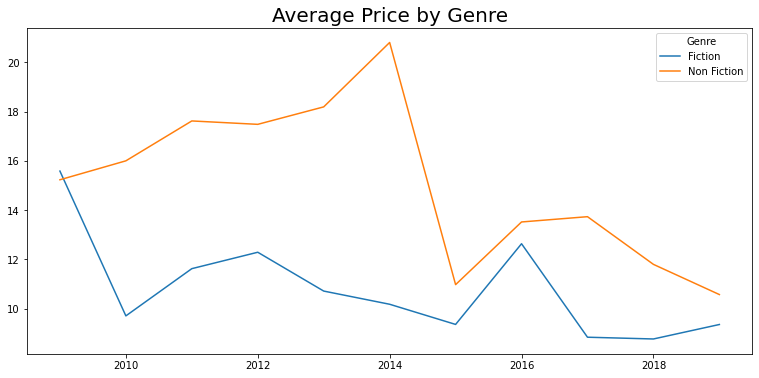

In [15]:
plt.figure(figsize=(13, 6))
avgprice_f = amazon[amazon['Genre'] == 'Fiction']
avgprice_f = avgprice_f.groupby(['Year'])['Price'].mean()
avgprice_f = avgprice_f.reset_index()

plt.plot(avgprice_f['Year'], avgprice_f['Price'], label = "Fiction")

avgprice_nf = amazon[amazon['Genre'] == 'Non Fiction']
avgprice_nf = avgprice_nf.groupby(['Year'])['Price'].mean()
avgprice_nf = avgprice_nf.reset_index()

plt.plot(avgprice_nf['Year'], avgprice_nf['Price'], label = "Non Fiction")
plt.title("Average Price by Genre", fontsize = 20)
plt.legend(title="Genre", fontsize = 10)
plt.show()